In [219]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [220]:
# Read in data
df = pd.read_csv('us_state_vaccinations.csv')  ## https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/us_state_vaccinations.csv
print(df.columns)

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used'],
      dtype='object')


In [221]:
# Clean up & select data to use
Colorado = df.loc[df.location == 'Colorado']
Illinois = df.loc[df.location == 'Illinois']

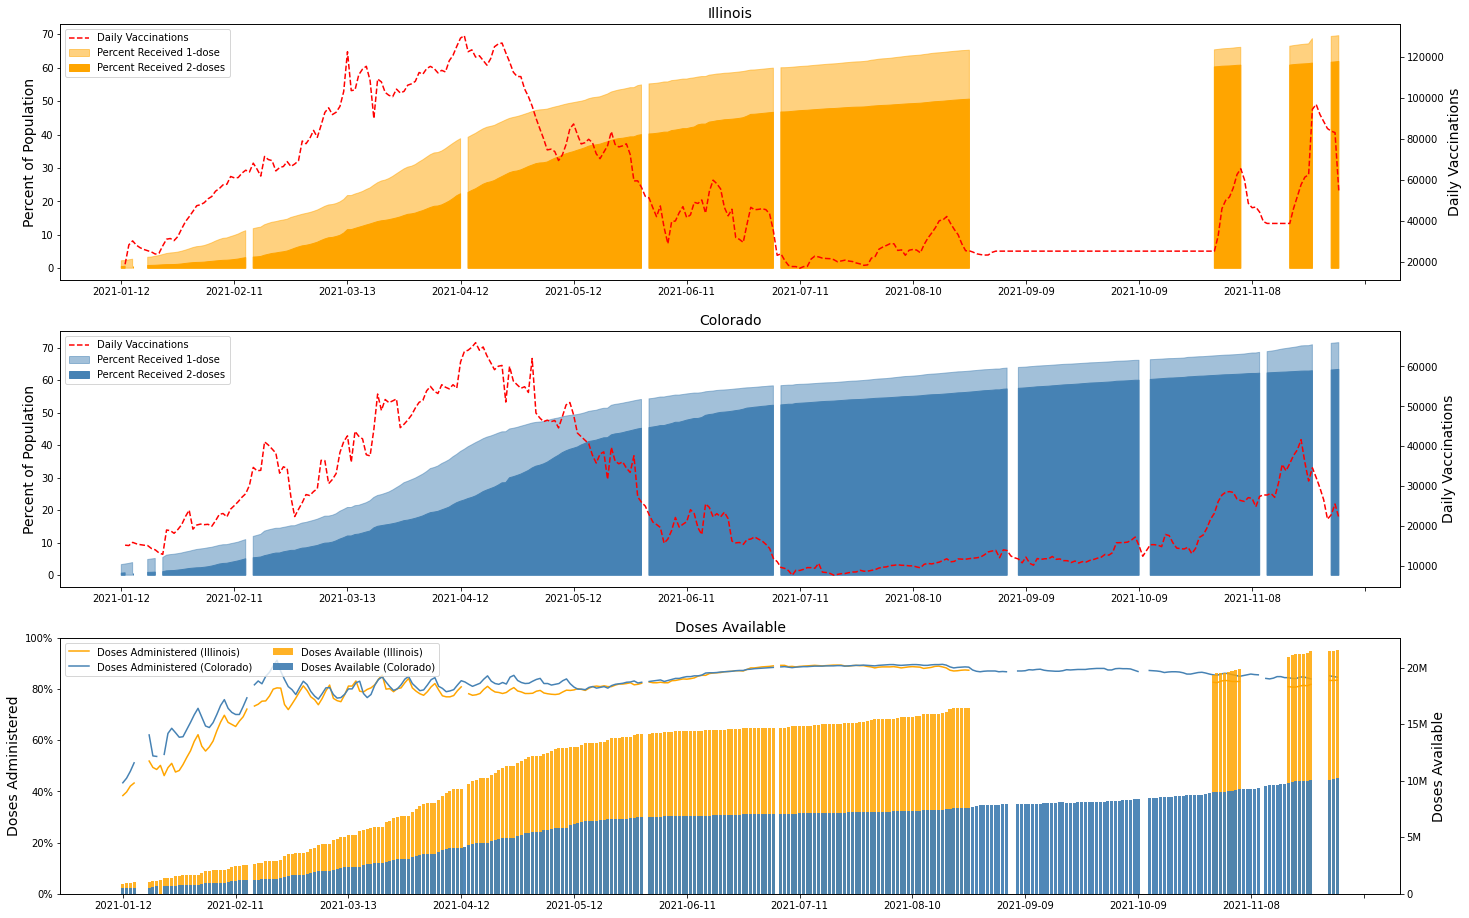

In [247]:
# Visualize
fig=plt.figure(figsize=(24,16))

ax1=fig.add_subplot(311)
ax2=ax1.twinx()
ax1.fill_between(Illinois.date, Illinois.people_vaccinated_per_hundred, alpha=0.5, color='orange', label='Percent Received 1-dose')
ax1.fill_between(Illinois.date, Illinois.people_fully_vaccinated_per_hundred, color='orange', label='Percent Received 2-doses')
ax1.plot(Illinois.date, Illinois.daily_vaccinations*np.nan, '--', color='red', label='Daily Vaccinations')
ax2.plot(Illinois.date, Illinois.daily_vaccinations, '--', color='red')
ax1.set_ylabel('Percent of Population',fontsize=14)
ax2.set_ylabel('Daily Vaccinations',fontsize=14)
ax1.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.title('Illinois',fontsize=14)
ax1.legend(loc='upper left',ncol=1)

ax1=fig.add_subplot(312)
ax2=ax1.twinx()
ax1.fill_between(Colorado.date, Colorado.people_vaccinated_per_hundred, alpha=0.5, color='steelblue', label='Percent Received 1-dose')
ax1.fill_between(Colorado.date, Colorado.people_fully_vaccinated_per_hundred, color='steelblue', label='Percent Received 2-doses')
ax1.plot(Colorado.date, Colorado.daily_vaccinations*np.nan, '--', color='red', label='Daily Vaccinations')
ax2.plot(Colorado.date, Colorado.daily_vaccinations, '--', color='red')
ax1.set_ylabel('Percent of Population',fontsize=14)
ax2.set_ylabel('Daily Vaccinations',fontsize=14)
ax1.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.title('Colorado',fontsize=14)
ax1.legend(loc='upper left',ncol=1)

ax1=fig.add_subplot(313)
ax2=ax1.twinx()
ax2.bar(Illinois.date, Illinois.total_distributed, color='orange', alpha=0.85, label='Doses Available (Illinois)')
ax2.plot(Illinois.date, Illinois.share_doses_used*np.nan, color='orange', label='Doses Administered (Illinois)')
ax1.plot(Illinois.date, Illinois.share_doses_used, color='orange')
ax2.bar(Colorado.date, Colorado.total_distributed, color='steelblue', alpha=0.95, label='Doses Available (Colorado)')
ax2.plot(Colorado.date, Colorado.share_doses_used*np.nan, color='steelblue', label='Doses Administered (Colorado)')
ax1.plot(Colorado.date, Colorado.share_doses_used, color='steelblue')
ax2.set_ylabel('Doses Available',fontsize=14)
ax1.set_ylabel('Doses Administered',fontsize=14)
ax1.set_ylim(0,1)
ax1.set_yticks=((0,0.2,0.4,0.6,0.8,1))
ax1.set_yticklabels(('0%','20%','40%','60%','80%','100%'))
ax2.set_yticks=((0,0.5,1.0,1.5,2.0))
ax2.set_yticklabels(('0','5M','10M','15M','20M'))
ax2.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.title('Doses Available',fontsize=14)
ax2.legend(loc='upper left',ncol=2)

plt.savefig('covid_assignment.png')